In [6]:
#klasyki
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#nowości
import h5py  #.hdf5
import matplotlib.animation as anim
from scipy.integrate import odeint
# uruchamiając live zakomentuj
# %matplotlib inline, bo ma się ruszać!
%matplotlib inline

# Ładne sprawkowe wykresy (z Gaussami)

(51,) (50,)
[ 1184.23478177     5.0707236      6.05781418]


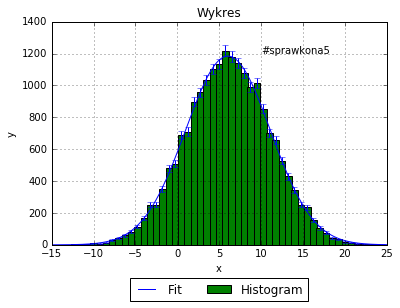

In [7]:
losowe_gaussowskie = np.random.normal(6, scale=5, size=20000)
y, x = np.histogram(losowe_gaussowskie, bins=50)
x_left = x[:-1] #x to krawiedzie wszystkich binow
x_center = x_left + (x[1] - x[0])/2 #bierzemy srodki do fitu
print(x.shape, y.shape)
#fitujemy gaussa

def Gauss(x, Amplituda, std, srodek):
    return Amplituda*np.exp(-(x-srodek)**2/2/std**2)

parametry, kowariancje = curve_fit(Gauss, x_center, y)
parametry = np.abs(parametry)
print(parametry)

x_fit = np.linspace(-15, 25, 1000)
y_fit = Gauss(x_fit, *parametry)

#wykresy
y_niepewnosci = np.sqrt(y)
plt.bar(x_left, y, color="green", label="Histogram")
plt.plot(x_fit, y_fit, "b-", linewidth=1, label="Fit")
plt.errorbar(x_center, y, y_niepewnosci, fmt='none')
    # fmt = 'none' by nie łączył linią

    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykres")
plt.text(10, 1200, "#sprawkona5")
plt.legend(loc = 'center', bbox_to_anchor=[0.5, -0.2],
           ncol=2)
plt.grid()
plt.show()

# Rozpakowywanie: *

In [8]:
A = [1, 2, 5, 7]
print(1, 2, 3, *A, A, sep="\n")

1
2
3
1
2
5
7
[1, 2, 5, 7]


# Praca z tablicami 2D: *plt.imshow, contour*

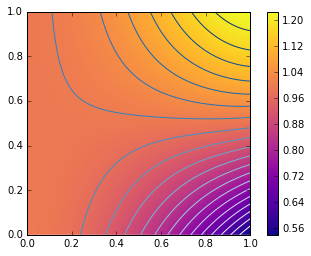

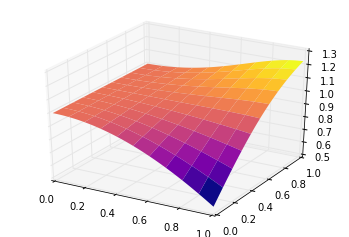

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = np.tanh(X**2*np.sin(Y)) + np.cos(X)

plt.imshow(Z, interpolation='none', cmap='plasma',
           extent=(0, 1, 0, 1),
           origin = 'lower') ###ZAPOMNIAŁEM O TYM, WAŻNE
                             #przestujcie bez tego
plt.colorbar()
plt.contour(X, Y, Z, levels=np.linspace(0.58, 1.20, 20),
            cmap='Blues')

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(X, Y, Z, linewidth=0, cmap='plasma')
plt.show()

# Animacje: imshow
### Odpalać bez %matplotlib inline!

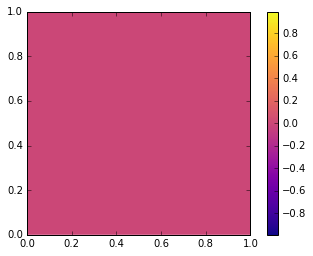

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import gamma
import matplotlib.animation as anim

x = y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

Z = np.exp(-(X-0.5)**2*10)*np.exp(-((Y-0.5)**2)*10) *\
    np.cos(20*np.sqrt((X-0.5)**2+(Y-0.5)**2)) #radialny cosinus

T = np.linspace(0, 8*np.pi, 100)
fig = plt.figure()
IM = plt.imshow(Z, interpolation='none', cmap='plasma',
                extent=(0, 1, 0, 1),
                vmax= Z.max(), vmin = -Z.max(),
                origin = 'lower') #niewiele zmienia - symetria

plt.colorbar()
def animate(t):
    IM.set_array(Z*np.sin(t))
    return [IM]

animation = anim.FuncAnimation(fig, animate, frames = T,
                               interval = 100, repeat = True)
plt.show() #odpalać live! :)

# Animacje: 3D

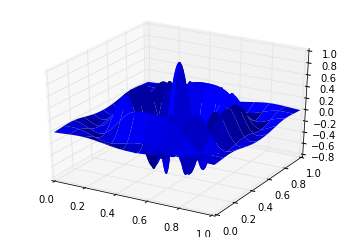

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as anim

x = y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X-0.5)**2*10)*np.exp(-((Y-0.5)**2)*10) *\
    np.cos(20*np.sqrt((X-0.5)**2+(Y-0.5)**2))
T = np.linspace(0, 8*np.pi, 100)

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
plot3d = ax3d.plot_surface(X, Y, Z, linewidth=0)
def animate(t):
    ###TODO: to z jakiegoś powodu nie działa, rozgryzam
    #plot3d(X, Y, Z*np.sin(t), linewidth=0)
    return [ax3d]

animation = anim.FuncAnimation(fig, animate, frames = T,
                               interval = 100, repeat = True)

plt.show()

# Animacja: Line3D

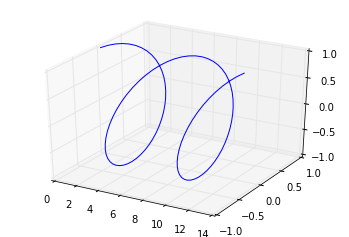

In [28]:
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)
z = np.cos(x)
w = 1000
T = np.linspace(0, 1, w)

fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
line, = plt.plot(x, y, z)

def animate(t):
    faza = x - w*t 
    line.set_data(x, np.sin(faza))
    line.set_3d_properties(np.cos(faza))
    return [line]


animation = anim.FuncAnimation(fig, animate, T, interval=100)
plt.show()

# Słowniki i h5py, czyli: warto wiedzieć iż są

In [29]:
lista_studentów = ["A Z", "B Y", "C X"]
słownik = {"A":"Z",
           "B":"Y",
           "Andrzej":"Hyhy"}
print(słownik["Andrzej"])
słownik["W"] = "M"
print(słownik)

import h5py
with h5py.File("dane.hdf5") as f:
    for nazwa in f:
        print(nazwa, type(f[nazwa][:100]))

Hyhy
{'Andrzej': 'Hyhy', 'B': 'Y', 'W': 'M', 'A': 'Z'}
Dane <class 'numpy.ndarray'>


In [75]:
# Atraktor lorentza
from scipy.integrate import odeint
N_czastek = 15
r_poczatkowe = [-20+np.random.random(3)*40 for n in range(N_czastek)]
T = np.linspace(0, 100, 10000)

sigma = 10
beta = 8/3
rho = 28

def pochodna(r, T):
    x, y, z = r
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y - beta*z
    return np.array([dxdt, dydt, dzdt])
r_all_lista = [odeint(pochodna, r, T) for r in r_poczatkowe]
# r_all.T.shape
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

for r_all in r_all_lista:
    x, y, z = r_all.T

    linia, = ax3d.plot(x,y,z, "-", alpha=0.3)
# punkcik, = ax3d.plot([x[0]], [y[0]], [z[0]], "mo")
# def init():
#     linia.set_data([], [])
#     linia.set_3d_properties([])
#     punkcik.set_data([], [])
#     punkcik.set_3d_properties([])
#     return [linia, punkcik]    
# def animate(i):
#     linia.set_data(x[:i+1], y[:i+1])
#     linia.set_3d_properties(z[:i+1])
#     punkcik.set_data(x[i], y[i])
#     punkcik.set_3d_properties(z[i])
#     return [linia, punkcik]

# animacja = anim.FuncAnimation(fig, animate, range(len(T)))

plt.show()

# Atraktor lorentza: animacja

In [ ]:
# Atraktor lorentza
from scipy.integrate import odeint
N_czastek = 15
r_poczatkowe = [-20+np.random.random(3)*40 for n in range(N_czastek)]
T = np.linspace(0, 100, 10000)

sigma = 10
beta = 8/3
rho = 28

def pochodna(r, T):
    x, y, z = r
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y - beta*z
    return np.array([dxdt, dydt, dzdt])
r_all_lista = [odeint(pochodna, r, T) for r in r_poczatkowe]
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

for r_all in r_all_lista:
    x, y, z = r_all.T
    linia, = ax3d.plot(x,y,z, "-")
# punkcik, = ax3d.plot([x[0]], [y[0]], [z[0]], "mo")
# def init():
#     linia.set_data([], [])
#     linia.set_3d_properties([])
#     punkcik.set_data([], [])
#     punkcik.set_3d_properties([])
#     return [linia, punkcik]    
# def animate(i):
#     linia.set_data(x[:i+1], y[:i+1])
#     linia.set_3d_properties(z[:i+1])
#     punkcik.set_data(x[i], y[i])
#     punkcik.set_3d_properties(z[i])
#     return [linia, punkcik]

# animacja = anim.FuncAnimation(fig, animate, range(len(T)))

plt.show()